# FIT5196 Assessment 3
#### Student Name: Swaraj Purohit
#### Student ID: 29286174

Date: 26/10/2018

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas 0.19.2 (for data frame, included in Anaconda Python 3.6) 
* matplotlib (for visualization, included in Anaconda Python 3.6)
* numpy (for using arrays, included in Anaconda Python 3.6)
* datetime (for getting datetime format, included in Anaconda Python 3.6)
* sklearn (for accessing statistical algorithms and preprocessing, included in Anaconda Python 3.6)
* shapefile (for reading shapefiles, included in Anaconda Python 3.6)
* shapely (for interpretting shapefiles, not included in Anaconda Python 3.6, will have to pip install)
* math (for getting mathematical operators such as log, included in Anaconda Python 3.6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task1

In [2]:
# Loading the json into a dataframe.
house_df1 = pd.read_json('real_state.json')
house_df1.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,18 Marylou Court,2.0,3.0,-37.711003,144.775893,2.0,4150000.0,12479.0,house,2015.0
1,15 Adelaide Street,1.0,3.0,-37.794857,144.887726,0.0,6370000.0,365.0,house,2007.0
2,25 Henry Street,1.0,2.0,-37.821062,145.042946,0.0,19550000.0,54313.0,house,2016.0
3,33 Urwin Street,1.0,4.0,-37.816015,144.865849,1.0,13617000.0,3393.0,house,2014.0
4,34 Norman Road,1.0,3.0,-37.786329,145.285484,2.0,8355000.0,64310.0,house,2016.0


In [3]:
# Reading the xml using elementtree structure.
import xml.etree.ElementTree as etree  
tree = etree.parse("real_state.xml") 
root = tree.getroot()     
root.tag

'root'

In [4]:
# Finding attributes in the xml.
for child in root:           
    print (child)

<Element 'bathrooms' at 0x000001EDD7787868>
<Element 'price' at 0x000001EDD788FD68>
<Element 'bedrooms' at 0x000001EDD78F2EA8>
<Element 'parking_space' at 0x000001EDD795AC78>
<Element 'year' at 0x000001EDD79C78B8>
<Element 'lat' at 0x000001EDD7A359F8>
<Element 'lng' at 0x000001EDD7AB2B38>
<Element 'property_type' at 0x000001EDD7B2FC78>
<Element 'addr_street' at 0x000001EDD7BAADB8>
<Element 'property_id' at 0x000001EDD7C30228>


In [5]:
print ("the total number of rows: ", len(root[0]))

the total number of rows:  1003


In [6]:
# Extracting all the values into respective lists.
elements = tree.findall('bathrooms/')
bathrooms = [elem.text for elem in elements]

elements = tree.findall('price/')
prices = [elem.text for elem in elements]

elements = tree.findall('bedrooms/')
bedrooms = [elem.text for elem in elements]

elements = tree.findall('parking_space/')
parking_spaces = [elem.text for elem in elements]

elements = tree.findall('year/')
years = [elem.text for elem in elements]

elements = tree.findall('lat/')
lats = [elem.text for elem in elements]

elements = tree.findall('lng/')
lngs = [elem.text for elem in elements]

elements = tree.findall('property_type/')
property_types = [elem.text for elem in elements]

elements = tree.findall('addr_street/')
addr_streets = [elem.text for elem in elements]

elements = tree.findall('property_id/')
property_ids = [elem.text for elem in elements]

# Creating a dictionary from the lists.
house_dict = {}
house_dict['bathrooms'] = bathrooms
house_dict['price'] = prices
house_dict['bedrooms'] = bedrooms
house_dict['parking_space'] = parking_spaces
house_dict['year'] = years
house_dict['lat'] = lats
house_dict['lng'] = lngs
house_dict['property_type'] = property_types
house_dict['addr_street'] = addr_streets
house_dict['property_id'] = property_ids

# Creating second housing dataframe
house_df2 = pd.DataFrame(house_dict)
house_df2.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,23 Hastings Crescent,1.0,3.0,-37.678674,144.908609,0.0,3080000.0,18497.0,house,2016.0
1,1/24 William Avenue,1.0,2.0,-38.00054932,145.257431,1.0,3910000.0,96388.0,house,2009.0
2,32 Bambury Street,3.0,4.0,-37.857892,145.293133,2.0,11611000.0,73545.0,house,2011.0
3,1 Tomintoul Court,1.0,3.0,-37.937523,145.102701,2.0,9035000.0,77042.0,house,2016.0
4,1/93 Ringwood Street,1.0,2.0,-37.806558,145.226903,2.0,3096000.0,61107.0,house,2011.0


In [7]:
house_df = house_df1.append(house_df2)

In [8]:
# See one row has all nulls
house_df.isna().sum()

addr_street      9
bathrooms        9
bedrooms         9
lat              9
lng              9
parking_space    9
price            9
property_id      9
property_type    9
year             9
dtype: int64

In [9]:
# Remove it
house_df.dropna(axis = 0 , how = 'all', inplace = True)

In [10]:
# All nulls removed.
house_df.isna().sum()

addr_street      0
bathrooms        0
bedrooms         0
lat              0
lng              0
parking_space    0
price            0
property_id      0
property_type    0
year             0
dtype: int64

In [11]:
# We can see rows may contains 'nan' as value
house_df['bedrooms'].unique()

array([3.0, 2.0, 4.0, 5.0, 1.0, '3.0', '2.0', '4.0', '5.0', '1.0', 'nan'],
      dtype=object)

In [12]:
house_df.reset_index(inplace = True, drop = True)

In [13]:
# Can see which rows have 'nan'
house_df[house_df['bedrooms'] == 'nan']

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
1350,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1959,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [14]:
# Drop those rows
house_df.drop(index = [1350,1959], inplace = True)

### Fixing Schema.

In [15]:
sample = pd.read_csv('sample.csv')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 22 columns):
Unnamed: 0                   4 non-null int64
property_id                  4 non-null int64
lat                          4 non-null float64
lng                          4 non-null float64
addr_street                  4 non-null object
suburb                       4 non-null object
price                        4 non-null int64
property_type                4 non-null object
year                         4 non-null int64
bedrooms                     4 non-null int64
bathrooms                    4 non-null int64
parking_space                4 non-null int64
shopping_center_id           4 non-null object
distance_to_sc               4 non-null int64
train_station_id             4 non-null int64
distance_to_train_station    4 non-null int64
travel_min_to_CBD            4 non-null int64
transfer_flag                4 non-null int64
hospital_id                  4 non-null object
distance_to_hosp

In [16]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2003
Data columns (total 10 columns):
addr_street      2002 non-null object
bathrooms        2002 non-null object
bedrooms         2002 non-null object
lat              2002 non-null object
lng              2002 non-null object
parking_space    2002 non-null object
price            2002 non-null object
property_id      2002 non-null object
property_type    2002 non-null object
year             2002 non-null object
dtypes: object(10)
memory usage: 172.0+ KB


In [17]:
house_df['lat'] = house_df['lat'].apply(float)
house_df['lng'] = house_df['lng'].apply(float)

In [18]:
for each in ['property_id', 'price', 'year', 'bedrooms', 'bathrooms', 'parking_space']:
    house_df[each] = house_df[each].apply(lambda x: int(str(x).split('.')[0]))

In [19]:
house_df.drop_duplicates(keep = 'first', inplace = True)
house_df.shape

(1967, 10)

### Finding closest Shopping Centres.

In [20]:
shops = pd.read_html('shopingcenters.html')
shop_df = pd.DataFrame(shops[0])
shop_df.head()

,Unnamed: 0,sc_id,lat,lng
0,0,SC_001,-37.767915,145.041790
1,1,SC_002,-37.819375,145.171472
2,2,SC_003,-37.971131,145.089065
3,3,SC_004,-35.280406,149.132550
4,4,SC_005,-37.574572,144.920451


In [21]:
shop_latlng = []
for i in range(shop_df.shape[0]):
    shop_latlng.append((shop_df.lat[i], shop_df.lng[i]))

In [22]:
# Creating a function which gives distance between two coordinates and the first coordinate.
import math

def haversine(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians 
    lon1r, lat1r, lon2r, lat2r = map(math.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2r - lon1r 
    dlat = lat2r - lat1r 
    a = math.sin(dlat/2)**2 + math.cos(lat1r) * math.cos(lat2r) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6378 * c

    return round(km,3), lon1, lat1

In [23]:
# Creating function which finds distance and coordinates of closest shopping centre.
# Then puts the coordinates in the shops df to get the shop id.
def closest_shop(row):
        
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), shop_latlng))
    return shop_df.loc[(shop_df['lat'] == lat) & (shop_df['lng'] == lon)].iloc[0,1]

# Applying the function to the house df to create a new column with closests shopping center id
house_df['shopping_center_id'] = house_df.apply(lambda x: closest_shop(x), axis = 1)

#Similar to above function but here we just return the minimum distance.
def dist_closest_shop(row):
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), shop_latlng))
    return d 

# Applying the function to the house df to create a new column with closest distance to the shopping center.
house_df['distance_to_sc'] = house_df.apply(lambda x: dist_closest_shop(x), axis = 1)

In [24]:
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,SC_107,3.315
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,SC_043,2.310
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,SC_083,0.650
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,SC_033,2.056
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,SC_022,1.436


### Finding closest Hospitals.
Using same approach as previous section.

In [25]:
hosp_df = pd.read_json('hospitals.json')
hosp_df.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [26]:
hosp_latlng = []
for i in range(hosp_df.shape[0]):
    hosp_latlng.append((hosp_df.lat[i], hosp_df.lng[i]))

In [27]:
# Similar function as previous section.
def closest_hosp(row):
        
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), hosp_latlng))
    return hosp_df.loc[(hosp_df['lat'] == lat) & (hosp_df['lng'] == lon)].iloc[0,0]

# Applying the function to the house df to create a new column with closest hospital id
house_df['hospital_id'] = house_df.apply(lambda x: closest_hosp(x), axis = 1)

#Similar to above function but here we just return the minimum distance.
def dist_closest_hosp(row):
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), hosp_latlng))
    return d 

# Applying the function to the house df to create a new column with closest distance
house_df['distance_to_hospital'] = house_df.apply(lambda x: dist_closest_hosp(x), axis = 1)

In [28]:
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,SC_107,3.315,hospital_057,6.473
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,SC_043,2.310,hospital_056,0.234
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,SC_083,0.650,hospital_127,0.848
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,SC_033,2.056,hospital_056,3.113
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,SC_022,1.436,hospital_164,3.550


### Finding closest Supermarket.
Using same approach as previous section.

In [29]:
super_df = pd.read_excel('supermarkets.xlsx')
super_df.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [30]:
super_latlng = []
for i in range(super_df.shape[0]):
    super_latlng.append((super_df.lat[i], super_df.lng[i]))

In [31]:
# Similar function to previous section.
def closest_super(row):
        
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), super_latlng))
    return super_df.loc[(super_df['lat'] == lat) & (super_df['lng'] == lon)].iloc[0,0]

# Applying the function to the house df to create a new column with closest supermarket id.
house_df['supermarket_id'] = house_df.apply(lambda x: closest_super(x), axis = 1)

#Similar to above function but here we just return the minimum distance.
def dist_closest_super(row):
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), super_latlng))
    return d 

# Applying the function to the house df to create a new column with closest supermarket id.
house_df['distance_to_supermaket'] = house_df.apply(lambda x: dist_closest_super(x), axis = 1)

In [32]:
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,SC_107,3.315,hospital_057,6.473,S_094,0.969
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,SC_043,2.310,hospital_056,0.234,S_201,1.117
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,SC_083,0.650,hospital_127,0.848,S_208,0.669
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,SC_033,2.056,hospital_056,3.113,S_149,2.518
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,SC_022,1.436,hospital_164,3.550,S_181,1.147


### Finding closest Train Stop.
Similar to previous section.

In [33]:
stop_df = pd.read_csv('stops.txt')
stop_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [34]:
stop_latlng = []
for i in range(stop_df.shape[0]):
    stop_latlng.append((stop_df.stop_lat[i], stop_df.stop_lon[i]))

After proceeding with the above stop_latlng list we find that two houses do not hav a direct trip to flinders beacause their nearest station (Flemington Racecourse) does not have any trips on weekdays. Hence we remove this stop from the above list and then proceed. The code below does this.

In [35]:
for i in range(len(stop_latlng)-1):
    if stop_latlng[i][0] == -37.787201923265 and stop_latlng[i][1] == 144.907588697812:
        del stop_latlng[i]

In [36]:
# Similar function to previous section.
def closest_stop(row):
        
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), stop_latlng))
    return stop_df.loc[(stop_df['stop_lat'] == lat) & (stop_df['stop_lon'] == lon)].iloc[0,0]

# Applying the function to the house df to create a new column with closest train station id.
house_df['train_station_id'] = house_df.apply(lambda x: closest_stop(x), axis = 1)

#Similar to above function but here we just return the minimum distance.
def dist_closest_stop(row):
    d,lon,lat = min(map(lambda x: haversine(x[1], x[0], float(row['lng']), float(row['lat'])), stop_latlng))
    return d 

# Applying the function to the house df to create a new column with closest distance.
house_df['distance_to_train_station'] = house_df.apply(lambda x: dist_closest_stop(x), axis = 1)

In [37]:
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,SC_107,3.315,hospital_057,6.473,S_094,0.969,20000,1.109
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,SC_043,2.310,hospital_056,0.234,S_201,1.117,20023,0.802
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,SC_083,0.650,hospital_127,0.848,S_208,0.669,19903,0.295
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,SC_033,2.056,hospital_056,3.113,S_149,2.518,20022,1.884
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,SC_022,1.436,hospital_164,3.550,S_181,1.147,19878,1.101


### Finding the Suburb

Using the shape file to create a polygon for each suburb. Then check which house is in what suburb and add the appropriate entry to the house dataframe.

In [38]:
# Reading the shape file to access its data into 'recs' which contains the suburb details and 'shapes' which contains
# the coordinate polygon of the suburb.
import shapefile

sf = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")
recs = sf.records()
shapes = sf.shapes()
recs

[['6670',
  datetime.date(2011, 8, 31),
  None,
  'VIC2615',
  datetime.date(2012, 4, 27),
  None,
  'UNDERBOOL',
  '',
  '',
  'G',
  None,
  '2'],
 ['6671',
  datetime.date(2011, 8, 31),
  None,
  'VIC1986',
  datetime.date(2012, 4, 27),
  None,
  'NURRAN',
  '',
  '',
  'G',
  None,
  '2'],
 ['6672',
  datetime.date(2011, 8, 31),
  None,
  'VIC2862',
  datetime.date(2012, 4, 27),
  None,
  'WOORNDOO',
  '',
  '',
  'G',
  None,
  '2'],
 ['6673',
  datetime.date(2011, 8, 31),
  None,
  'VIC734',
  datetime.date(2017, 8, 9),
  None,
  'DEPTFORD',
  '',
  '',
  'G',
  None,
  '2'],
 ['6674',
  datetime.date(2011, 8, 31),
  None,
  'VIC2900',
  datetime.date(2012, 4, 27),
  None,
  'YANAC',
  '',
  '',
  'G',
  None,
  '2'],
 ['6405',
  datetime.date(2011, 8, 31),
  None,
  'VIC1688',
  datetime.date(2012, 4, 27),
  None,
  'MINIMAY',
  '',
  '',
  'G',
  None,
  '2'],
 ['6451',
  datetime.date(2011, 8, 31),
  None,
  'VIC999',
  datetime.date(2012, 4, 27),
  None,
  'GLEN FORBES',
  ''

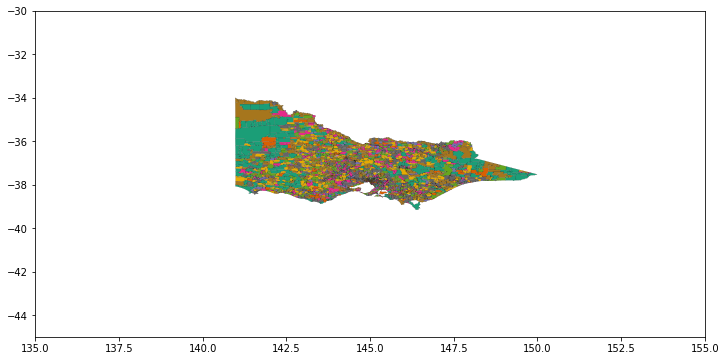

In [39]:
# Plotting suburbs on map using code from tutorial 11.

import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

cm = plt.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*np.arange(Nshp)/Nshp) 

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

for nshp in range(Nshp): 
    ptchs   = []
    pts     = np.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in range(len(prt)): 
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
    
ax.set_xlim(135,+155)
ax.set_ylim(-45,-30)

plt.show()

In [40]:
len(recs)

2973

In [41]:
# Creating function to find suburbs
import shapely
from shapely.geometry import shape, Point

# Creating function to find suburb based on lat and lng from the shapefile.
def suburb_finder(row):
    
    for i in range(len(shapes)):
        
        polygon = shape(shapes[i])    
        point = Point(float(row['lng']), float(row['lat']))

        if polygon.contains(point):
            return(recs[i][6])
            break

In [42]:
# Applying the function to the house datframe to get suburb for each house. May take upto 15 mins.
house_df['suburb'] = house_df.apply(lambda x: suburb_finder(x), axis = 1)
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,suburb
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,SC_107,3.315,hospital_057,6.473,S_094,0.969,20000,1.109,DELAHEY
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,SC_043,2.310,hospital_056,0.234,S_201,1.117,20023,0.802,FOOTSCRAY
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,SC_083,0.650,hospital_127,0.848,S_208,0.669,19903,0.295,HAWTHORN
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,SC_033,2.056,hospital_056,3.113,S_149,2.518,20022,1.884,YARRAVILLE
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,SC_022,1.436,hospital_164,3.550,S_181,1.147,19878,1.101,CROYDON


### Time to Flinders.

In [43]:
cal_df = pd.read_csv('calendar.txt')
cal_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [44]:
# We can see that only T0 runs on all weekdays hence this is the only valid service Id.
weekday_serviceIDs = ['T0']

In [45]:
trips_df = pd.read_csv('trips.txt')
trips_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [46]:
# Keeping only those trips running on all the weekdays.
trips_df = trips_df[trips_df['service_id'].isin(weekday_serviceIDs)]

In [47]:
stop_times_df = pd.read_csv('stop_times.txt')
stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [48]:
# Keeping only those entries which are on all weekdays.
stop_times_df = stop_times_df[stop_times_df['trip_id'].isin(trips_df.trip_id.tolist())]

In [49]:
# Getting stop Id for Flinders
stops_df = pd.read_csv('stops.txt')
stops_df[stops_df['stop_name'].str.contains('Flinders')]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


In [50]:
# trips_to_flinders1 gives all trips heading to the city
trips_to_flinders1 = trips_df[trips_df['trip_headsign'] == 'City (Flinders Street)']['trip_id'].tolist()

# trips_to_flinders2 gives all trips which contains flinders station as a stop
trips_to_flinders2 = []
a = stop_times_df.groupby(by = 'trip_id')
for key, group in a:
    if 19854 in group['stop_id'].tolist():
        trips_to_flinders2.append(key)
        
# trips_to_flinders contains all trips going to city and stopping at flinders
trips_to_flinders = list(set(trips_to_flinders1).intersection(set(trips_to_flinders2)))

In [51]:
len(trips_to_flinders) 

1032

Getting transfer flag for each row.

In [52]:
# Creating function to determine whether there is a direct trip to flinders.
def transit_checker(row):
    valid_trips = stop_times_df[(stop_times_df['stop_id'] == int(row['train_station_id'])) & (stop_times_df['departure_time'] <= '21:00:00') & (stop_times_df['departure_time'] >= '07:00:00') & stop_times_df['trip_id'].isin(trips_to_flinders)]['trip_id'].tolist()
    if valid_trips:
        return 0
    else:
        return 1

In [53]:
# Applying the function to the house dataframe.
house_df['transfer_flag'] = house_df.apply(lambda x: transit_checker(x), axis = 1)

In [54]:
# All flags are 0 i.e. all have direct trips.
house_df[house_df['transfer_flag'] == 1]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,suburb,transfer_flag


Calculating travel time to CBD seeing that all flags are 0.

In [55]:
import datetime
def time2flinders(row):
        if row['transfer_flag'] == 0:
            valid_trips = stop_times_df[(stop_times_df['stop_id'] == int(row['train_station_id'])) & (stop_times_df['departure_time'] <= '21:00:00') & (stop_times_df['departure_time'] >= '07:00:00') & stop_times_df['trip_id'].isin(trips_to_flinders)]['trip_id'].tolist()
            
            dep = stop_times_df[(stop_times_df['trip_id'].isin(valid_trips)) & (stop_times_df['stop_id'] == int(row['train_station_id']))]['departure_time']
            arr = stop_times_df[(stop_times_df['trip_id'].isin(valid_trips)) & (stop_times_df['stop_id'] == 19854)]['arrival_time']
            
            dep = np.array(list(map(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"), dep)))
            arr = np.array(list(map(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"), arr)))

            time = arr - dep
            time = np.array(list(map(lambda x: x.seconds/60, time)))
            return time.mean()
        else:
            return -1

house_df['travel_min_to_CBD'] = house_df.apply(lambda x: time2flinders(x),  axis = 1)

In [56]:
house_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,suburb,transfer_flag,travel_min_to_CBD
0,18 Marylou Court,2,3,-37.711003,144.775893,2,4150000,12479,house,2015,...,3.315,hospital_057,6.473,S_094,0.969,20000,1.109,DELAHEY,0,37.592593
1,15 Adelaide Street,1,3,-37.794857,144.887726,0,6370000,365,house,2007,...,2.310,hospital_056,0.234,S_201,1.117,20023,0.802,FOOTSCRAY,0,18.346939
2,25 Henry Street,1,2,-37.821062,145.042946,0,19550000,54313,house,2016,...,0.650,hospital_127,0.848,S_208,0.669,19903,0.295,HAWTHORN,0,17.268293
3,33 Urwin Street,1,4,-37.816015,144.865849,1,13617000,3393,house,2014,...,2.056,hospital_056,3.113,S_149,2.518,20022,1.884,YARRAVILLE,0,20.346939
4,34 Norman Road,1,3,-37.786329,145.285484,2,8355000,64310,house,2016,...,1.436,hospital_164,3.550,S_181,1.147,19878,1.101,CROYDON,0,47.512821


### Fixing the schema

In [57]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 22 columns):
Unnamed: 0                   4 non-null int64
property_id                  4 non-null int64
lat                          4 non-null float64
lng                          4 non-null float64
addr_street                  4 non-null object
suburb                       4 non-null object
price                        4 non-null int64
property_type                4 non-null object
year                         4 non-null int64
bedrooms                     4 non-null int64
bathrooms                    4 non-null int64
parking_space                4 non-null int64
shopping_center_id           4 non-null object
distance_to_sc               4 non-null int64
train_station_id             4 non-null int64
distance_to_train_station    4 non-null int64
travel_min_to_CBD            4 non-null int64
transfer_flag                4 non-null int64
hospital_id                  4 non-null object
distance_to_hosp

In [58]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2003
Data columns (total 21 columns):
addr_street                  1967 non-null object
bathrooms                    1967 non-null int64
bedrooms                     1967 non-null int64
lat                          1967 non-null float64
lng                          1967 non-null float64
parking_space                1967 non-null int64
price                        1967 non-null int64
property_id                  1967 non-null int64
property_type                1967 non-null object
year                         1967 non-null int64
shopping_center_id           1967 non-null object
distance_to_sc               1967 non-null float64
hospital_id                  1967 non-null object
distance_to_hospital         1967 non-null float64
supermarket_id               1967 non-null object
distance_to_supermaket       1967 non-null float64
train_station_id             1967 non-null int64
distance_to_train_station    1967 non-null fl

In [59]:
house_df = house_df[['property_id', 'lat', 'lng', 'addr_street', 'suburb', 'price', 'property_type', 'year', 'bedrooms', 'bathrooms', 'parking_space', 'shopping_center_id', 'distance_to_sc', 'train_station_id', 'distance_to_train_station', 'travel_min_to_CBD', 'transfer_flag', 'hospital_id', 'distance_to_hospital', 'supermarket_id', 'distance_to_supermaket']]

In [60]:
house_df['travel_min_to_CBD'] = house_df['travel_min_to_CBD'].apply(lambda x: int(round(x))) 

In [61]:
for each in ['distance_to_sc', 'distance_to_train_station', 'distance_to_hospital', 'distance_to_supermaket']:
    house_df[each] = house_df[each].apply(lambda x: int(round(x*1000)))

In [62]:
house_df.to_csv('29286174_solution.csv')

# Task2

In [63]:
df = house_df.loc[:, ['price', 'property_type', 'bedrooms', 'bathrooms', 'parking_space']]

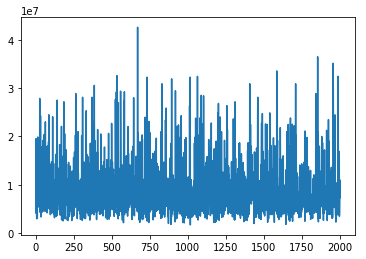

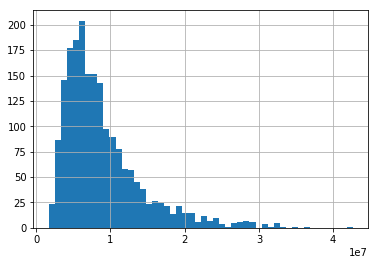

In [64]:
# Getting distribution of price.
df['price'].plot()
plt.show()
df['price'].hist(bins =50)
plt.show()

### Standardization

In [65]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df['price'].reshape(-1,1))
df['price_std'] = std_scale.transform(df['price'].reshape(-1,1)) 
df.head()

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,price,property_type,bedrooms,bathrooms,parking_space,price_std
0,4150000,house,3,2,2,-0.870326
1,6370000,house,3,1,0,-0.463728
2,19550000,house,2,1,0,1.950220
3,13617000,house,4,1,1,0.863577
4,8355000,house,3,1,2,-0.100170


We can see that standardisation has no effect on the shape of graph or the histogram however the range has been reduced to roughly [-2,6]. The mean and standard deviation are approximately 0 and 1 respectively.

In [66]:
# Mean of standardized price
df['price_std'].mean()

1.5521674213112256e-17

In [67]:
# Standard deviation of standardized price.
df['price_std'].std()

1.0002542911674919

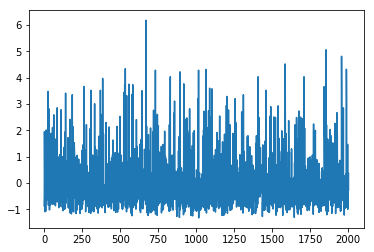

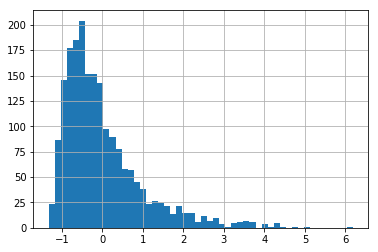

In [68]:
df['price_std'].plot()
plt.show()
df['price_std'].hist(bins = 50)
plt.show()

### Min Max Normalization

In [69]:
minmax_scale = preprocessing.MinMaxScaler().fit(df['price'].reshape(-1,1))
df['price_minmax'] = minmax_scale.transform(df['price'].reshape(-1,1))

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


We can see that after min-max normalization, the shape of the graph remains the same but the range changes with the minimum value being zero and maximum being 1.

In [70]:
df['price_minmax'].min()

0.0

In [71]:
df['price_minmax'].max()

1.0

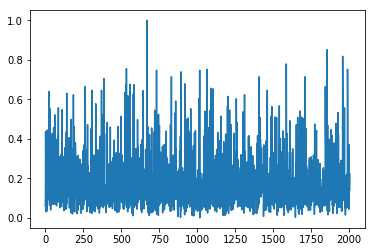

In [72]:
df['price_minmax'].plot()
plt.show()

### Log, Power and Square Root Transformation.
* Log Transform: We can see that the graph shape changes and the distribution becomes more normal.
* Power Transform: The distribution becomes exponentially decreasing.
* Square Root Transform: The distribution is kind of normal but biased towards the left side of the mean. 

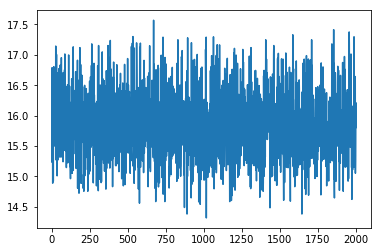

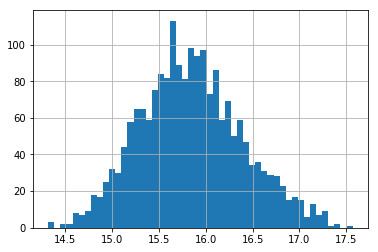

In [73]:
# Creating column with log transform of price
import math
df['price_log'] = df['price'].apply(math.log)
# Plotting the log transformed price values
df['price_log'].plot()
plt.show()
# Plotting histograms shows an almost normal distribution. 
df['price_log'].hist(bins= 50)
plt.show()

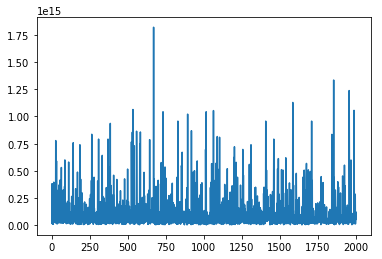

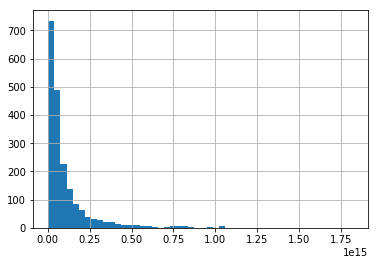

In [74]:
# Creating column with power transform
df['price_pow'] = df['price'].apply(lambda x: x**2)
# Plotting distribution of power transformed price.
df['price_pow'].plot()
plt.show()
# Plotting histograms shows an exponentially decreasing distribution. 
df['price_pow'].hist(bins = 50)
plt.show()

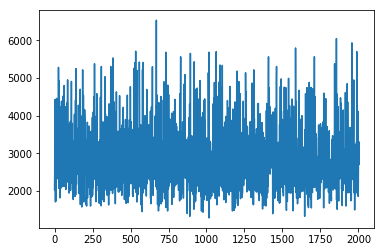

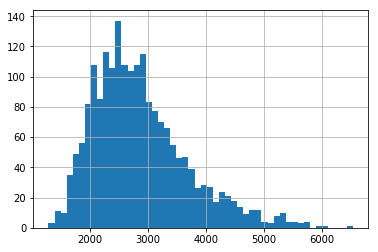

In [75]:
# Creating column with square root transform of price
df['price_sqrt'] = df['price'].apply(lambda x: x**0.5)
# Plotting the values
df['price_sqrt'].plot()
plt.show()
# Plotting the histogram
df['price_sqrt'].hist(bins = 50)
plt.show()

### Comparing the reshaping methods for the linear model.

In [76]:
df.head()

,price,property_type,bedrooms,bathrooms,parking_space,price_std,price_minmax,price_log,price_pow,price_sqrt
0,4150000,house,3,2,2,-0.870326,0.060923,15.238619,17222500000000,2037.154879
1,6370000,house,3,1,0,-0.463728,0.115044,15.667110,40576900000000,2523.885893
2,19550000,house,2,1,0,1.950220,0.436359,16.788486,382202500000000,4421.538194
3,13617000,house,4,1,1,0.863577,0.291718,16.426830,185422689000000,3690.121949
4,8355000,house,3,1,2,-0.100170,0.163436,15.938371,69806025000000,2890.501687


In [77]:
# Since house is the only property type, we do not use this variable to create the model.
df.property_type.unique()

array(['house'], dtype=object)

We fit the model for each transformation method applied to the price column. The histogram of errors in prediction on the test set is used to evaluate performance since all models give very low R squared. As a whole we can see that the least overall errors are observed when we go with min max normalization with majority of errors lying in the range of -0.2 and 0.2. Also, it is the only one which gives better result than simply using price. Hence we will choose min max normalization of price column to build the linear model.

C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Swaraj Purohit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


price
0.06588436837909806


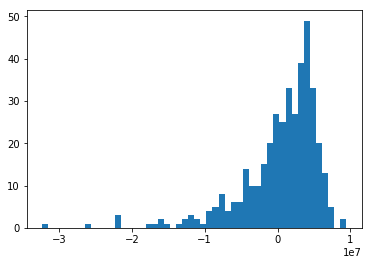

price_std
0.06588436837909806


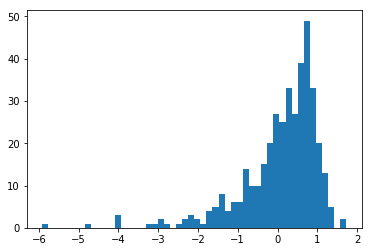

price_minmax
0.06588436837909806


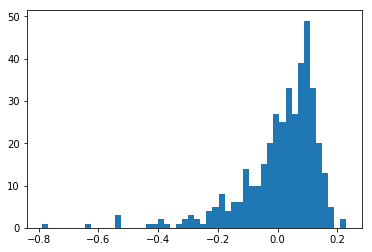

price_log
0.05988269883351105


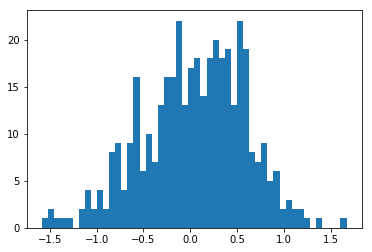

price_pow
0.056872993625427304


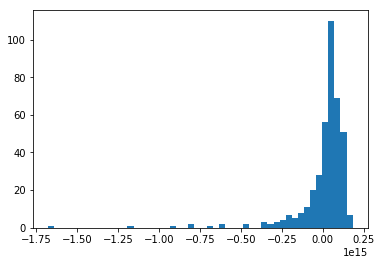

price_sqrt
0.0649292057569203


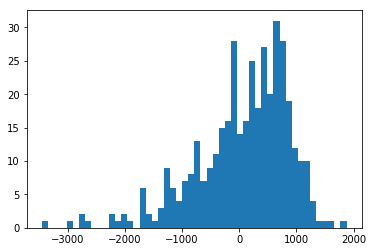

In [78]:
# Using histogram of errors on the test set to evaluate model.
for each in [0,5,6,7,8,9]:
    X = df.iloc[:,[2,3,4]].values
    y = df.iloc[:,each].values

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    sc_X = preprocessing.StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(df.columns[each])
    print(regressor.score(X_train, y_train))

    y_pred = regressor.predict(X_test)
    
    plt.hist((y_pred-y_test), bins = 50)
    plt.show()